In [1]:
from sqlalchemy import create_engine, String, Integer, BigInteger, Column, Float, insert, select, update,delete, func
from sqlalchemy.orm import sessionmaker, declarative_base
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
from datetime import datetime
import kaggle 

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

### 6. **Discount Effectiveness**
   - **Analysis**: Evaluate how discounts and promo codes influence purchase amounts. Analyze the average purchase before and after discounts.
   - **Objective**: Determine the effectiveness of promotional strategies.

In [32]:
discount = df[df['Discount Applied'] == 'Yes'][['Purchase Amount (USD)']]
no_discount = df[df['Discount Applied'] == 'No'][['Purchase Amount (USD)']]

discount_matric = ({
    'total count': len(discount['Purchase Amount (USD)']),
    'min': discount['Purchase Amount (USD)'].min(),
    'max' : discount['Purchase Amount (USD)'].max(),
    'mean' : discount['Purchase Amount (USD)'].mean(),
    's_d' : discount['Purchase Amount (USD)'].std()
})

no_discount_matric = ({
    'total count': len(no_discount['Purchase Amount (USD)']),
    'min': no_discount['Purchase Amount (USD)'].min(),
    'max' : no_discount['Purchase Amount (USD)'].max(),
    'mean' : no_discount['Purchase Amount (USD)'].mean(),
    's_d' : no_discount['Purchase Amount (USD)'].std()
})
discount_df = pd.DataFrame({'Disocunt': discount_matric,
                           'No Discount': no_discount_matric
                          })
print(discount_df)

result = 'The average purchase size for discounted items is lower than for non-discounted items, which is expected if customers are buying similar products. This suggests that discounts often lead to purchases of lower-priced items. \nThe $0.83 difference in mean  indicates that, on average, non-discounted purchases are slightly higher in value. However, this small difference suggests that the presence of a discount does not significantly shift consumers to bulk purchase.\nThe lower average purchase amount among discounted products can have a negative effect on overall revenue for the company. While discounts increase the number of transactions, they may also reduce the average sale value, potentially leading to lower profits.'
print(result)

                Disocunt  No Discount
total count  1679.000000  2223.000000
min            20.000000    20.000000
max           100.000000   100.000000
mean           59.297796    60.130454
s_d            23.618631    23.740327
The average purchase size for discounted items is lower than for non-discounted items, which is expected if customers are buying similar products. This suggests that discounts often lead to purchases of lower-priced items. 
The $0.83 difference in mean  indicates that, on average, non-discounted purchases are slightly higher in value. However, this small difference suggests that the presence of a discount does not significantly shift consumers to bulk purchase.
The lower average purchase amount among discounted products can have a negative effect on overall revenue for the company. While discounts increase the number of transactions, they may also reduce the average sale value, potentially leading to lower profits.


### 7. **Payment Method Preferences**
   - **Analysis**: Analyze the preferred payment methods across different customer demographics and how they relate to purchase amounts.
   - **Objective**: Tailor payment options to customer preferences to enhance user experience.

note: to study the loop 

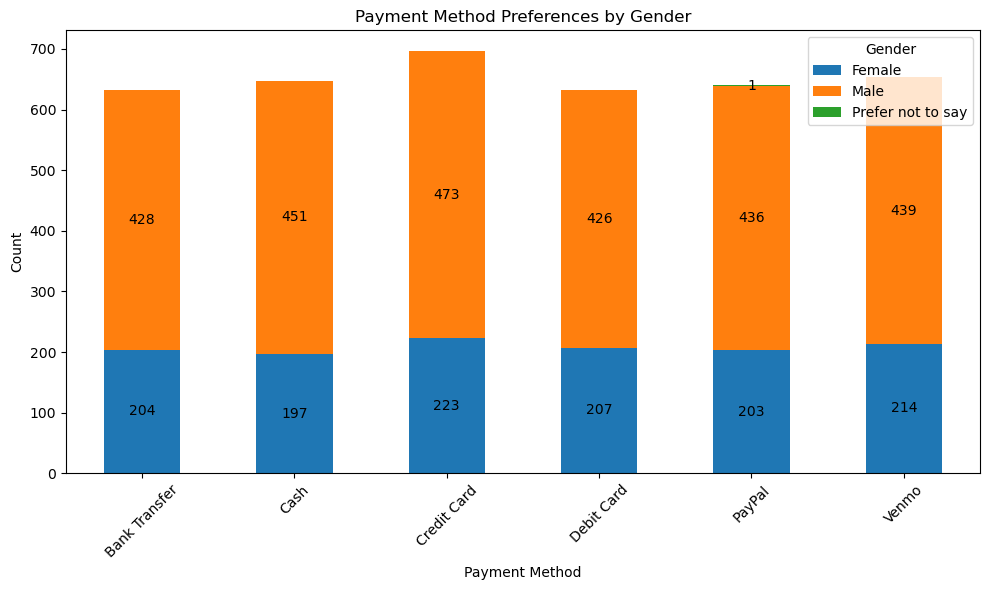

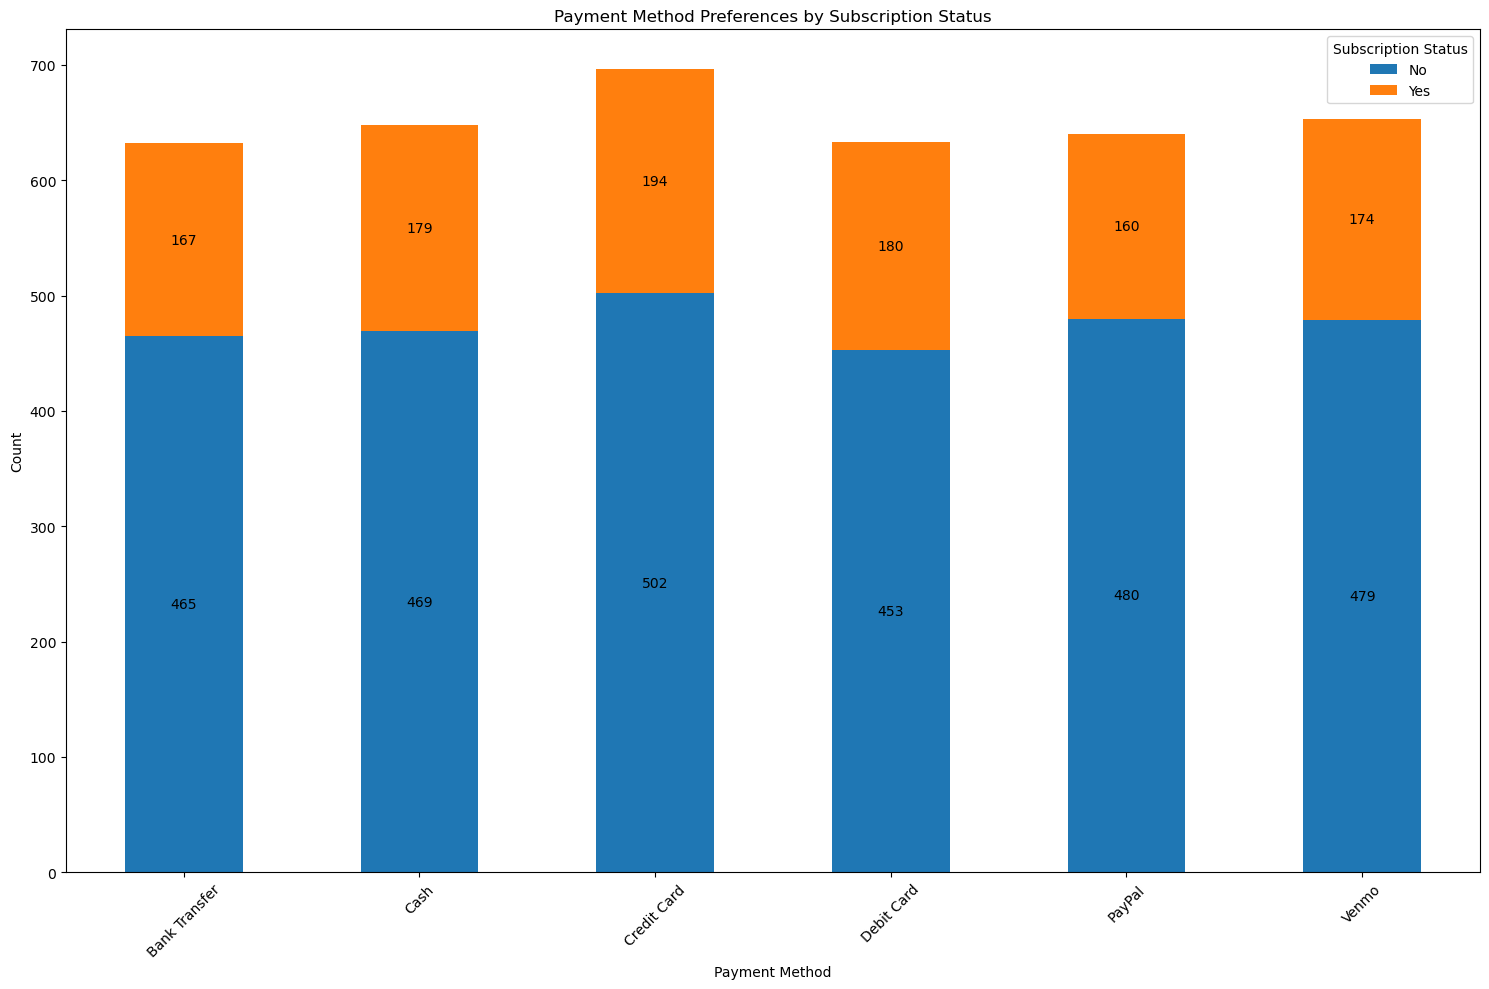

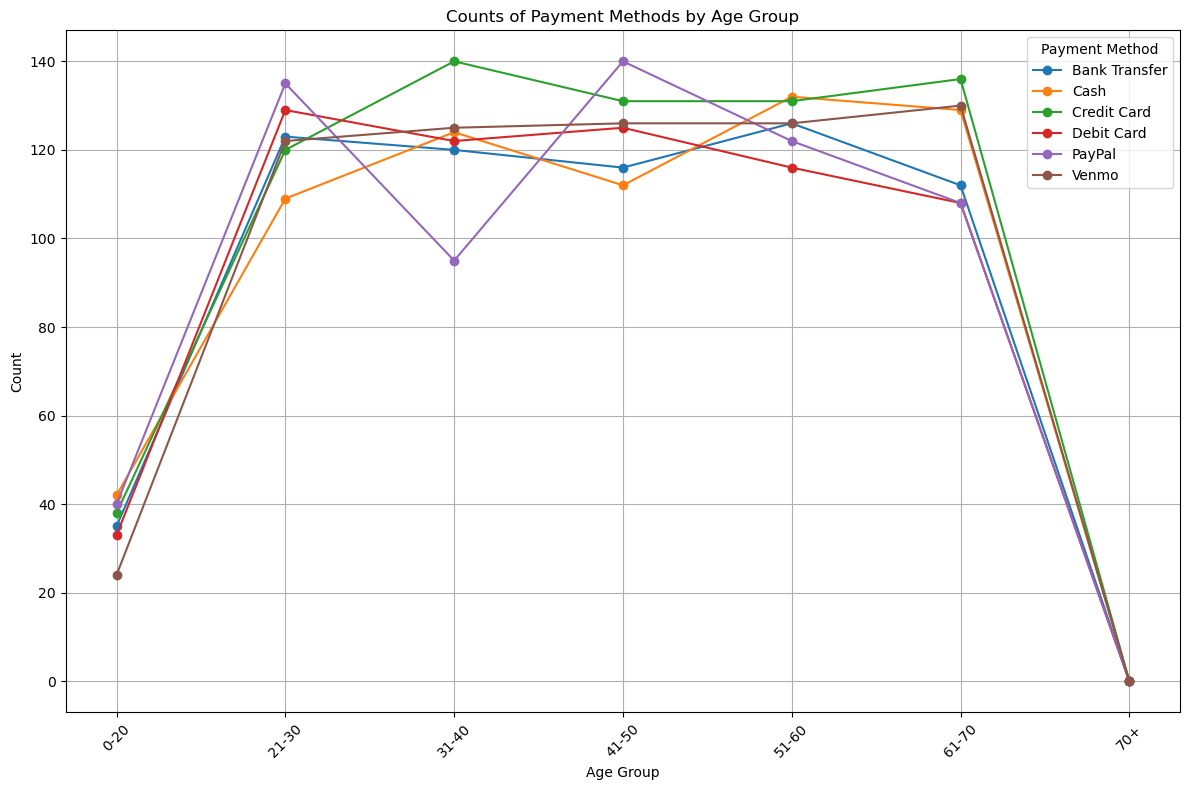

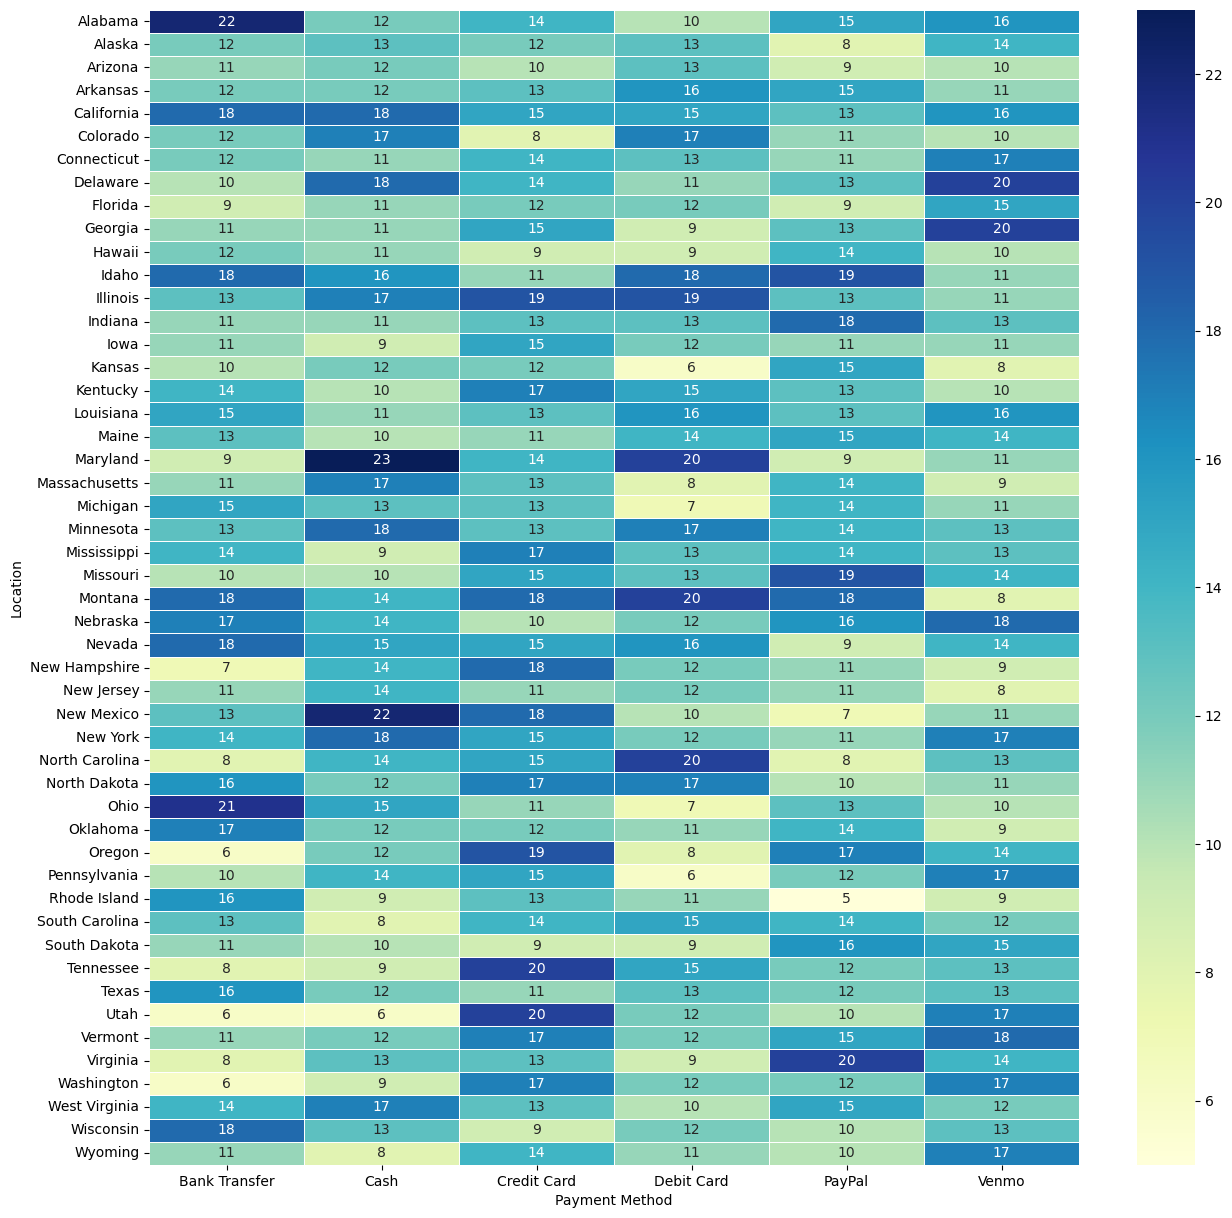

"plt.figure(figsize = (20,15))\nfor payment_method in pivot_df_location.columns:\n    plt.plot(pivot_df_location.index, pivot_df_location[payment_method], marker = 'o', label = payment_method)\n\nplt.xlabel('Location')\nplt.ylabel('Count')\nplt.title('Counts of Payment Methods by Locations')\nplt.xticks(rotation=45)\nplt.legend(title='Payment Method')\nplt.grid()\nplt.tight_layout()\n\nplt.show()\n"

In [35]:

df_pmp = df[['Gender','age_group','Location','Subscription Status','Payment Method']]

#age group vs payment method 
# Count occurrences of each payment method by gender
gen_payment_counts = df_pmp.groupby(['Payment Method', 'Gender']).size().unstack(fill_value=0)

# create a stacked bar plot
ax = gen_payment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# annotate bars with counts in the middle of each segment
for i in range(gen_payment_counts.shape[0]):  # Iterate over each payment method
    cumulative_sum = gen_payment_counts.iloc[:i + 1].sum(axis=1)
    bottom = 0  # Initialize bottom position for the segments
    for gender in gen_payment_counts.columns:  # Iterate over each gender
        count = gen_payment_counts.loc[gen_payment_counts.index[i], gender]
        if count > 0:  # Only annotate if count is greater than 0
            ax.text(
                i, 
                bottom + count / 2,  # Position in the middle of the segment
                str(count),
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='black'  # Text color
            )
        bottom += count  # Update the bottom position for the next segment


plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method Preferences by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

plt.show()



#subsription status vs payment method 
sub_payment_counts = df_pmp.groupby(['Payment Method','Subscription Status']).size().unstack(fill_value =0)

ax = sub_payment_counts.plot(kind = 'bar', stacked = True, figsize = (15,10), color = ['#1f77b4', '#ff7f0e'])

for i in range(sub_payment_counts.shape[0]):
    cum_sum = sub_payment_counts.iloc[:i+1].sum(axis =1)
    bottom = 0
    for sub in sub_payment_counts.columns:
        count = sub_payment_counts.loc[sub_payment_counts.index[i], sub]
        if count > 0:
            ax.text(
                i,
                bottom + count /2,
                str(count),
                ha = 'center',
                va = 'center',
                color= 'black'
            )
        bottom += count
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method Preferences by Subscription Status')
plt.xticks(rotation=45)
plt.legend(title='Subscription Status')
plt.tight_layout()

plt.show()



#age_group vs payment method 
age_group_payment = df_pmp.groupby('Payment Method')['age_group'].value_counts().reset_index(name = 'Count')

pivot_df_age_group = age_group_payment.pivot(index='age_group', columns='Payment Method', values='Count').fillna(0)


plt.figure(figsize=(12, 8))
for payment_method in pivot_df_age_group.columns:
    plt.plot(pivot_df_age_group.index, pivot_df_age_group[payment_method], marker='o', label=payment_method)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Counts of Payment Methods by Age Group')
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.grid()
plt.tight_layout()


plt.show()
'''
bar plot
plt.figure(figsize = (15,10))
sns.barplot(data = age_group_payment, x = 'age_group', y = 'Count', hue = 'Payment Method')
plt.show()
'''



#location vs payment method 
location_payment = df_pmp.groupby('Payment Method')['Location'].value_counts().reset_index(name = 'Count')
pivot_df_location = location_payment.pivot(index = 'Location', columns = 'Payment Method', values = 'Count').fillna(0)

plt.figure(figsize = (15,15))
sns.heatmap(pivot_df_location, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.show()

'''plt.figure(figsize = (20,15))
for payment_method in pivot_df_location.columns:
    plt.plot(pivot_df_location.index, pivot_df_location[payment_method], marker = 'o', label = payment_method)

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Counts of Payment Methods by Locations')
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.grid()
plt.tight_layout()

plt.show()
'''


### 8. **Seasonal Trends Analysis**
   - **Analysis**: Investigate seasonal trends in sales and customer preferences. Identify peak purchasing seasons for different categories.
   - **Objective**: Optimize inventory and marketing campaigns based on seasonal demand.


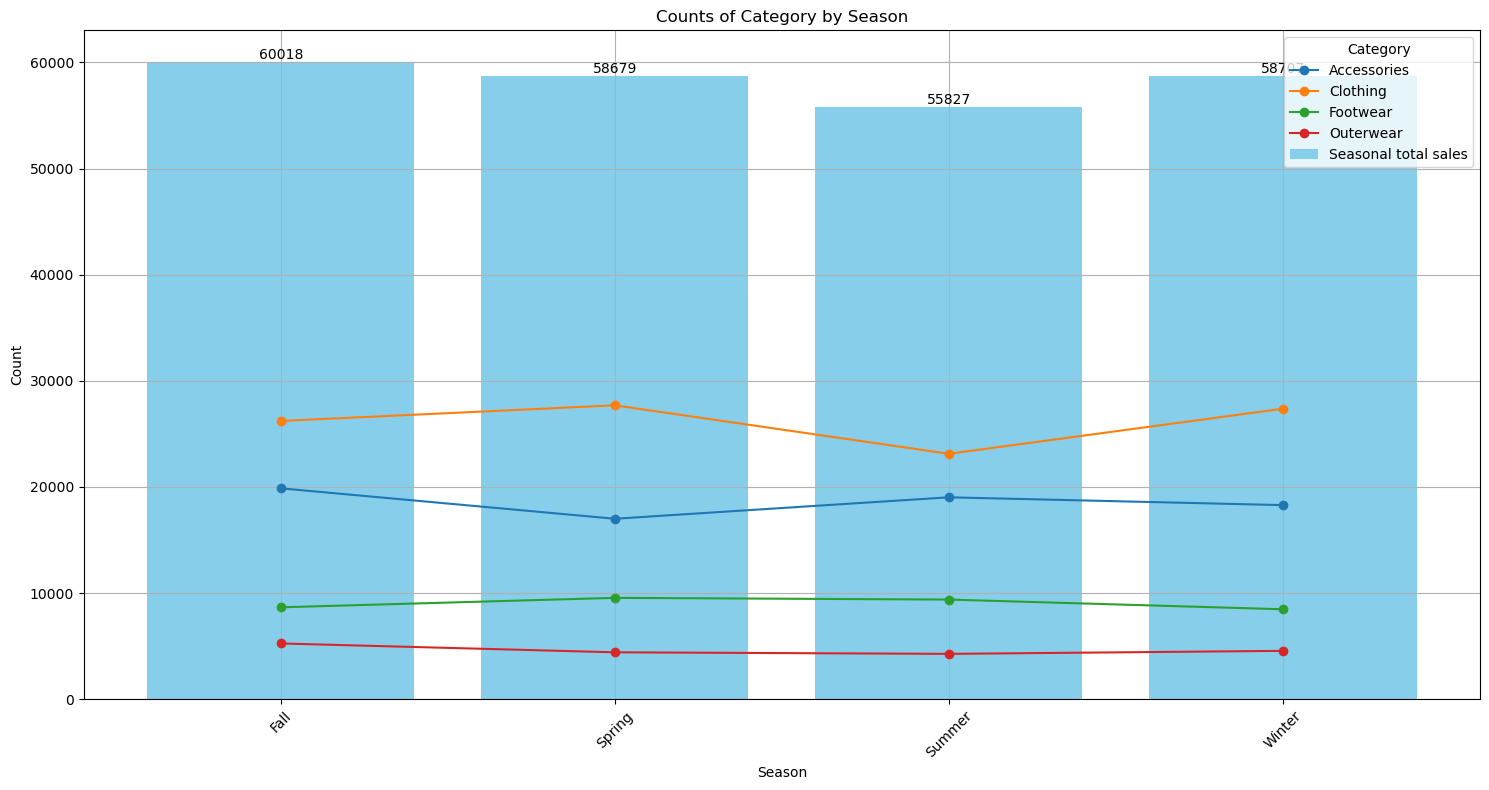

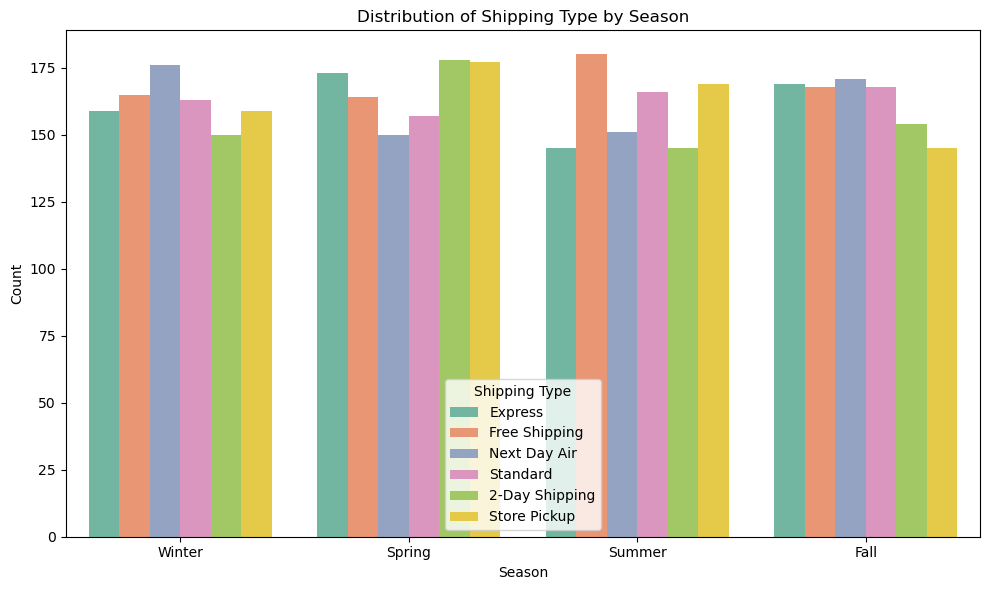

In [37]:
df.head()
df_sta = df[['Season','Category','Shipping Type','Purchase Amount (USD)']]
seasonal_cat_sales = df_sta.groupby(['Season','Category'])['Purchase Amount (USD)'].sum().reset_index(name = 'total_sales')
seasonal_cat_sales_pivot = seasonal_cat_sales.pivot(index = 'Season', columns = 'Category', values = 'total_sales').fillna(0)

plt.figure(figsize=(15, 8))
for seasons in seasonal_cat_sales_pivot.columns:
    plt.plot(seasonal_cat_sales_pivot.index, seasonal_cat_sales_pivot[seasons], marker='o', label=seasons)



seasonal_sales = df_sta.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()

plt.bar(seasonal_sales['Season'], seasonal_sales['Purchase Amount (USD)'], color = 'skyblue', label = 'Seasonal total sales')

for i, count in enumerate(seasonal_sales['Purchase Amount (USD)']):
    plt.text(i, count, f'{count}', va='bottom', ha='center')


plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Counts of Category by Season')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid()
plt.tight_layout()

plt.show()




plt.figure(figsize=(10, 6))
sns.countplot(data=df_sta, x='Season', hue='Shipping Type', palette='Set2')
plt.title('Distribution of Shipping Type by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Shipping Type')
plt.xticks()
plt.tight_layout()
plt.show()

'''
heatmap is better for large dataset

# Create a pivot table for the heatmap
heatmap_data = df_sta.groupby(['Season', 'Shipping Type']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Shipping Type Distribution by Season')
plt.xlabel('Shipping Type')
plt.ylabel('Season')
plt.tight_layout()
plt.show()

'''

result = 'clothing and accessories show reverse trend in spring and summer, thus suitable inventory and marketing should be implemented, especially they are in consecutive seasons'




### 9. **Customer Lifetime Value (CLV) Estimation**
   - **Analysis**: Estimate the lifetime value of customers based on their purchase frequency and average purchase amount.
   - **Objective**: Inform marketing budgets and customer acquisition strategies.

overall clv:6664.975948797905


C:\Users\hosin\AppData\Local\Temp\ipykernel_13216\2250887837.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clv['yr_of_purchase'] = ((df_clv['Previous Purchases'] +1) / df_clv['Expected yearly purchase frequency'])
C:\Users\hosin\AppData\Local\Temp\ipykernel_13216\2250887837.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clv['customer_clv'] = df_clv['Purchase Amount (USD)']*df_clv['Expected yearly purchase frequency']*df_clv['yr_of_purchase']


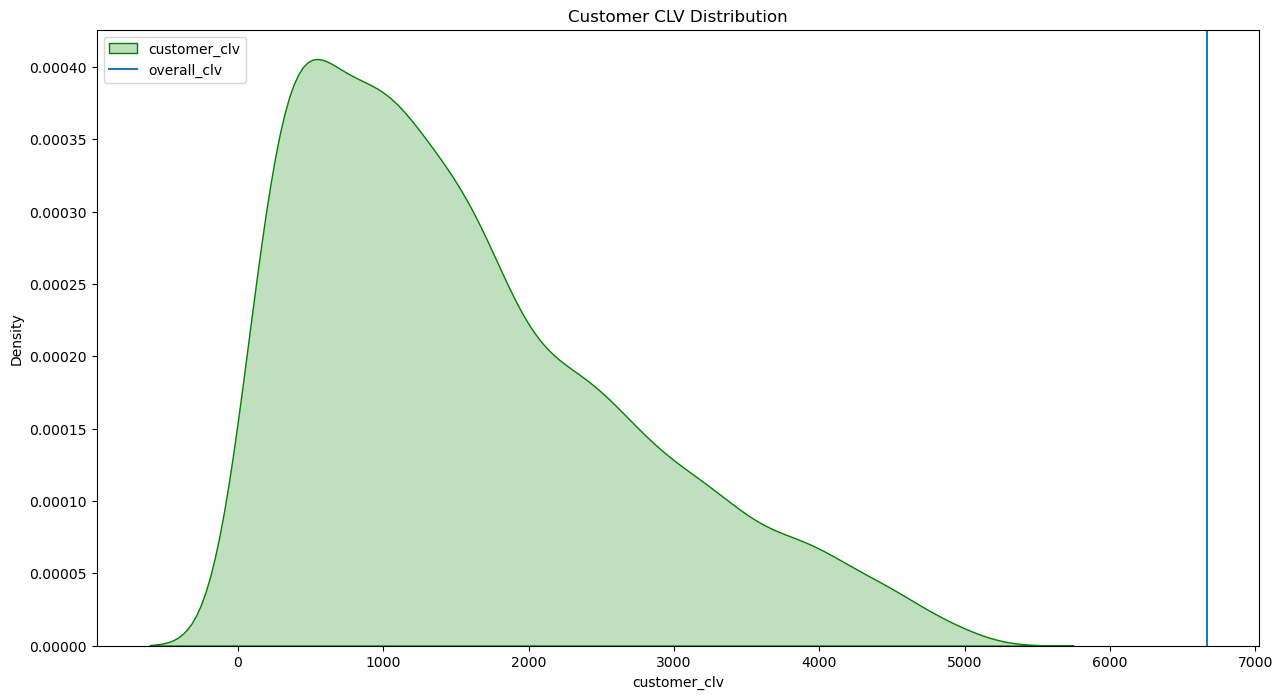

' \nKey Insights\nRight-Skewed Distribution:\nA right-skewed distribution means that most customers have relatively low CLVs, while a smaller number of customers have very high CLVs. This is common in many businesses where a few customers account for a large portion of total revenue.\nOverall CLV Outside the Range:\nIf the overall CLV is outside the range of individual customer CLVs, it likely indicates that the calculation of overall CLV includes additional factors or aggregate values that are not represented in the individual calculations.\nThis can happen if the overall CLV includes projected future values or estimates based on broader market trends rather than just the current customer data.\nPossible Reasons for the Discrepancy\nHigh-Value Customers:\nA few high-value customers may be significantly inflating the overall average, especially if they make large purchases infrequently. Their influence can pull the average higher than the typical individual CLV.\nMarket Projections:\nI

In [39]:
df_clv = df[['Purchase Amount (USD)','Previous Purchases','Expected yearly purchase frequency']]

#overall customer lifetime value 
avg = df_clv['Purchase Amount (USD)'].mean()
pu_avg = df_clv['Expected yearly purchase frequency'].mean()
avg_yr = ((df_clv['Previous Purchases'] +1) / df_clv['Expected yearly purchase frequency']).mean()


overall_clv = avg*pu_avg*avg_yr
print(f'overall clv:{overall_clv}') 

#single customer clv, assumption purchase amount in the avg purchase amount 
df_clv['yr_of_purchase'] = ((df_clv['Previous Purchases'] +1) / df_clv['Expected yearly purchase frequency'])

df_clv['customer_clv'] = df_clv['Purchase Amount (USD)']*df_clv['Expected yearly purchase frequency']*df_clv['yr_of_purchase']

plt.figure(figsize = (15,8))
sns.kdeplot(data = df_clv, x = 'customer_clv', fill = True, color = 'green', label = 'customer_clv')
plt.title('Customer CLV Distribution')
plt.axvline(overall_clv, label = 'overall_clv')
plt.legend()
plt.show()

''' 
Key Insights
Right-Skewed Distribution:
A right-skewed distribution means that most customers have relatively low CLVs, while a smaller number of customers have very high CLVs. This is common in many businesses where a few customers account for a large portion of total revenue.
Overall CLV Outside the Range:
If the overall CLV is outside the range of individual customer CLVs, it likely indicates that the calculation of overall CLV includes additional factors or aggregate values that are not represented in the individual calculations.
This can happen if the overall CLV includes projected future values or estimates based on broader market trends rather than just the current customer data.
Possible Reasons for the Discrepancy
High-Value Customers:
A few high-value customers may be significantly inflating the overall average, especially if they make large purchases infrequently. Their influence can pull the average higher than the typical individual CLV.
Market Projections:
If the overall CLV is calculated using projections about future purchasing behavior (e.g., trends, market growth), it might lead to a higher value that does not reflect the current customer data.
Inclusion of All Customers:
The overall CLV may consider all potential customers, including those who may not have made any purchases yet, thus increasing the average.
Implications for Strategy
Focus on High-Value Segments:
Identify and nurture relationships with high-value customers. Understanding what drives their loyalty can help replicate their behavior in other customers.
Customer Retention Strategies:
Consider implementing retention strategies aimed at increasing the CLV of lower-value customers to bring them closer to the overall average.
Analysis of Customer Behavior:
Conduct further analysis to segment customers by behavior and purchasing patterns. This can help in designing targeted marketing campaigns and improving customer experience.
'''

In [40]:
df

,Age,Gender,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Previous Purchases,Frequency of Purchases,age_group,cluster,Expected yearly purchase frequency
0,55,Male,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,14,Fortnightly,51-60,2,26
1,19,Male,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,2,Fortnightly,0-20,1,26
2,50,Male,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,23,Weekly,41-50,1,52
3,21,Male,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49,Weekly,21-30,0,52
4,45,Male,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,31,Annually,41-50,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,46,Female,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,24,Quarterly,41-50,2,4
3898,44,Female,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,24,Weekly,41-50,1,52
3899,52,Female,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,33,Quarterly,51-60,0,4
3900,25,Male,Clothing,100,Oregon,L,White,Winter,4.0,Yes,PayPal,Free Shipping,Yes,5,Quarterly,21-30,1,4


In [92]:
#load df to sql
import pandas as pd
from sqlalchemy import create_engine

username = 'root'
password = '**********'
host = '127.0.0.1'
port = '3306'
database = 'consumer_analysis'
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}', echo = True)

df.to_sql(name='shooping_trend_python_ed', con=engine, index=False, if_exists='replace')



2025-03-14 15:56:17,930 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2025-03-14 15:56:17,932 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-03-14 15:56:17,940 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2025-03-14 15:56:17,941 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-03-14 15:56:17,944 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2025-03-14 15:56:17,945 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-03-14 15:56:17,947 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-03-14 15:56:17,962 INFO sqlalchemy.engine.Engine DESCRIBE `consumer_analysis`.`shooping_trend_python_ed`
2025-03-14 15:56:17,967 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-03-14 15:56:17,989 INFO sqlalchemy.engine.Engine 
CREATE TABLE shooping_trend_python_ed (
	`Age` BIGINT, 
	`Gender` TEXT, 
	`Category` TEXT, 
	`Purchase Amount (USD)` BIGINT, 
	`Location` TEXT, 
	`Size` TEXT, 
	`Color` TEXT, 
	`Season` TEXT, 
	`Review Rating` FLOAT(53), 
	`Subscription Status` TEXT, 
	`Payment Meth

3902